In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

servico = Service (r'C:\Users\Alexandre\anaconda3\chromedriver.exe')
navegador = webdriver.Chrome(service=servico)
navegador.get("https://br.investing.com/indices/indices-futures")
page_content = navegador.page_source
site = BeautifulSoup(page_content, 'html.parser')
descricao = site.find('div', attrs={'data-test':'price-table'})

print(descricao.prettify())


<div class="table-browser_table-browser-wrapper__2ynbE" data-test="price-table">
 <table class="datatable_table__2Qbdw table-browser_table-browser__143gb datatable_table--border__1hROx datatable_table--mobile-grid__23eXx datatable_table--narrow__25R8G" style='--grid-columns:auto auto 1fr auto auto;--grid-template:"flag name name last last" "clock time expire chg chg-pct"'>
  <thead class="datatable_head__3otcL">
   <tr class="datatable_row__2vgJl">
    <th class="datatable_cell__3gwri datatable_cell--align-end__Wua8C">
     <div class="datatable_cell__wrapper__FYb2U">
      <span>
      </span>
     </div>
    </th>
    <th class="datatable_cell__3gwri table-browser_col-name__zC57H">
     <div class="datatable_cell__wrapper__FYb2U">
      <button class="inv-button datatable_sort__PtCHP" type="button">
       <span>
        Índice
       </span>
       <span class="flex flex-col">
        <svg aria-hidden="true" class="datatable_sort-icon__3tIWO datatable_sort-icon-up__1qOuk" fill="none

In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

vetValor = []

servico = Service (r'C:\Users\Alexandre\anaconda3\chromedriver.exe')
navegador = webdriver.Chrome(service=servico)
navegador.get("https://br.investing.com/indices/indices-futures")

ibov = navegador.find_element(By.XPATH, 
                                  "/html/body/div[1]/div[2]/div/div/div[2]/main/div[3]/div/table/tbody/tr[1]/td[4]").text
navegador.quit()

vetValor.append(ibov)
print(vetValor)

['111.705,00']


,DATA,ABERTURA,FECHAMENTO,VARIACAO,MINIMO,MAXIMO,VOLUME
0,2020-08-31,102142,99369,-2.72,99369,102142,"32,52B"
1,2020-09-01,99382,102168,2.82,99382,102238,"28,68B"
2,2020-09-02,102168,101911,-0.25,100872,102824,"23,34B"
3,2020-09-03,101911,100721,-1.17,99751,103226,"39,39B"
4,2020-09-04,n/d,101242,0.52,98961,101582,"28,16B"
...,...,...,...,...,...,...,...
493,2022-08-25,112898,113532,0.56,112768,114156,"54,51B"
494,2022-08-26,113533,112299,-1.09,111978,114091,"50,75B"
495,2022-08-29,112296,112323,0.02,111689,113222,"25,85B"
496,2022-08-30,112323,110431,-1.68,110103,112869,"50,60B"


,DATA,ABERTURA,FECHAMENTO,VARIACAO,MINIMO,MAXIMO,VOLUME
0,2020-08-31 00:00:00,102142,99369,-2.72,99369,102142,"32,52B"
1,2020-09-01 00:00:00,99382,102168,2.82,99382,102238,"28,68B"
2,2020-09-02 00:00:00,102168,101911,-0.25,100872,102824,"23,34B"
3,2020-09-03 00:00:00,101911,100721,-1.17,99751,103226,"39,39B"
4,2020-09-04 00:00:00,n/d,101242,0.52,98961,101582,"28,16B"
...,...,...,...,...,...,...,...
494,2022-08-26 00:00:00,113533,112299,-1.09,111978,114091,"50,75B"
495,2022-08-29 00:00:00,112296,112323,0.02,111689,113222,"25,85B"
496,2022-08-30 00:00:00,112323,110431,-1.68,110103,112869,"50,60B"
497,2022-08-31 00:00:00,110431,109523,-0.82,109523,111364,"59,66B"


                    DATA ABERTURA  FECHAMENTO VARIACAO  MINIMO  MAXIMO  VOLUME
106  2021-02-05 00:00:00   119261      120240     0.82  119261  121117  35,27B
361  2022-02-15 00:00:00   113905      114828     0.82  113882  114828  35,91B


<AxesSubplot:>

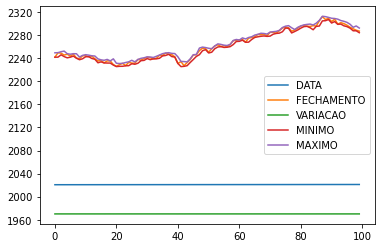

In [41]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import plotly.express as px
import time
import re 

#Pegando a data local
data_contador = time.localtime()
data = time.strftime('%Y-%m-%d %H:%M:%S', data_contador)

#Iniciando o navegador 
servico = Service (r'C:\Users\Alexandre\anaconda3\chromedriver.exe')
navegador = webdriver.Chrome(service=servico)
navegador.get("https://www.infomoney.com.br/cotacoes/b3/indice/ibovespa/historico/")

#Extraindo informações do navegador

#Pegando variação
variacao = navegador.find_element(By.XPATH, '/html/body/div[4]/div/div[1]/div[1]/div/div[3]/div[2]/p').text
caractere_remover = '%'
caractere = '|'.join(map(re.escape, caractere_remover))
variacao = re.sub(caractere, '', variacao)

#Pegando máximo
maximo = navegador.find_element(By.XPATH, '/html/body/div[4]/div/div[1]/div[1]/div/div[3]/div[4]/p').text 
maximo = re.sub(r'[^\w\s]','',maximo)
maximo = int(maximo)

#Pegando mínimo
minimo = navegador.find_element(By.XPATH, '/html/body/div[4]/div/div[1]/div[1]/div/div[3]/div[3]/p').text
minimo = re.sub(r'[^\w\s]','',minimo)
minimo = int(minimo)

#Pegando fechamento
fechamento = navegador.find_element(By.XPATH, '/html/body/div[4]/div/div[1]/div[1]/div/div[3]/div[1]/p').text
fechamento = re.sub(r'[^\w\s]','',fechamento)
fechamento = int(fechamento)

# Finalizando o navegador
navegador.quit()


#Lendo o arquivo xlsx
tabela_Ibov = pd.read_excel(r"Ibovespa (IBOV) - Histórico  InfoMoney.xlsx")
display(tabela_Ibov)

tabela_teste = tabela_Ibov

qtd_tuplas = tabela_Ibov['DATA'].count()

#Adicionando as informações na próxima tupla encontrada
tabela_teste.loc[qtd_tuplas] = [data,'102142',fechamento,variacao,minimo,maximo, '32,52B']
display(tabela_teste)
print(tabela_teste.loc[tabela_teste['VARIACAO'] == 0.82])
tabela_teste.head(100).plot()

